# Analyzing Where Do People Drink?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

df = pd.read_csv('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/edx/project/drinks.csv')
df.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


**Question 1.** Display the data types of each column using the attribute dtype

In [2]:
df.dtypes

country                          object
beer_servings                     int64
spirit_servings                   int64
wine_servings                     int64
total_litres_of_pure_alcohol    float64
continent                        object
dtype: object

**Question 2.** Use the method `groupby` to get the number of wine servings per continent

In [3]:
df.groupby('continent')[['wine_servings']].mean()

# Note that this is for each continent
# the UNweighted average of national per capita wine consumption

,wine_servings
continent,
Africa,16.264151
Asia,9.068182
Europe,142.222222
North America,24.521739
Oceania,35.625000
South America,62.416667


**Question 3.** Perform a statistical summary and analysis of beer servings for each continent

In [4]:
df.groupby('continent')[['beer_servings']].describe()

beer_servings                                              \
                      count        mean        std   min     25%    50%   
continent                                                                 
Africa                 53.0   61.471698  80.557816   0.0   15.00   32.0   
Asia                   44.0   37.045455  49.469725   0.0    4.25   17.5   
Europe                 45.0  193.777778  99.631569   0.0  127.00  219.0   
North America          23.0  145.434783  79.621163   1.0   80.00  143.0   
Oceania                16.0   89.687500  96.641412   0.0   21.00   52.5   
South America          12.0  175.083333  65.242845  93.0  129.50  162.5   

                              
                  75%    max  
continent                     
Africa          76.00  376.0  
Asia            60.50  247.0  
Europe         270.00  361.0  
North America  198.00  285.0  
Oceania        125.75  306.0  
South America  198.00  333.0

**Question 4.** Use the function boxplot in the seaborn library to produce a plot that can be used to show the number of beer servings on each continent

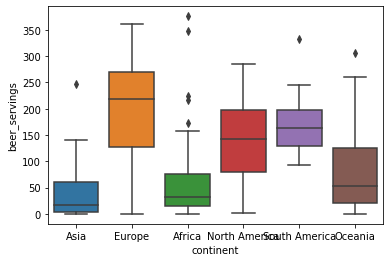

In [5]:
import seaborn as sns
sns.boxplot(df.continent, df.beer_servings);

**Question 5.** Use the function `regplot` in the `seaborn` library to determine if the number of wine servings is negatively or positively correlated with the number of beer servings



===== beer_servings and wine_servings are POSITIVELY correlated =====




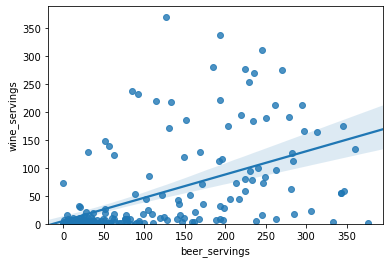

In [6]:
sns.regplot(df.beer_servings,df.wine_servings)
plt.ylim(0,)

print('''

===== beer_servings and wine_servings are POSITIVELY correlated =====

''')

**Question 6.** Fit a linear regression model to predict the `'total_litres_of_pure_alcohol'` using the number of `'wine_servings'` then calculate $R^2$

In [7]:
from sklearn.linear_model import LinearRegression

X = df[['wine_servings']]
y = df.total_litres_of_pure_alcohol

reg = LinearRegression()
reg.fit(X,y)

print(f'''

===== R^2 is {reg.score(X,y) :.4f} on training data =====

''')



===== R^2 is 0.4457 on training data =====




**Question 7.** Use the list of features to predict the `'total_litres_of_pure_alcohol'`, split the data into training and testing and determine the $R^2$ on the test data

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df[['beer_servings','spirit_servings','wine_servings']],
    df.total_litres_of_pure_alcohol,
    test_size = 0.2,
    random_state = 0,
)

reg = LinearRegression()
reg.fit(X_train,y_train)

print(f'''

===== R^2 is {reg.score(X_test,y_test) :.4f} on test data =====

''')



===== R^2 is 0.7325 on test data =====




**Question 8.**
Create a pipeline object that scales the data, performs a polynomial transform and fits a linear regression model.
Fit the object using the training data in the question above,
then calculate the $R^2$ using the test data.
Take a screenshot of your code and the $R^2$

In [9]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

pipe = Pipeline([
    ('scale', StandardScaler()),
    ('polynomial', PolynomialFeatures(include_bias=False)), # default order 2
    ('model', LinearRegression()),
])

pipe.fit(X_train,y_train)

print(f'''

===== R^2 is {pipe.score(X_test,y_test) :.4f} on test data =====

''')



===== R^2 is 0.7406 on test data =====




**Question 9.**
Create and fit a Ridge regression object using the training data,
setting the regularization parameter to 0.1 and calculate the $R^2$ using the test data.
Take a screenshot of your code and the $R^2$

In [10]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=0.1)
ridge.fit(X_train,y_train)

print(f'''

===== R^2 is {ridge.score(X_test,y_test) :.4f} on test data =====

''')



===== R^2 is 0.7325 on test data =====




<b>Question 10 </b>: Perform a 2nd order polynomial transform on both the training data and testing data.  Create and fit a Ridge regression object using the training data, setting the regularization parameter to 0.1. Calculate the $R^{2}$ utilizing the test data provided. Take a screen-shot of your code and the $R^{2}$. 

In [11]:
pipe2 = Pipeline([
    ('polynomial', PolynomialFeatures(degree=2, include_bias=False)),
    ('model', Ridge(alpha=0.1)),
])

pipe2.fit(X_train,y_train)

print(f'''

===== R^2 is {pipe2.score(X_test,y_test) :.4f} on test data =====

''')



===== R^2 is 0.7406 on test data =====




**Sources**  
[Dear Mona Followup: Where Do People Drink The Most Beer, Wine And Spirits?](https://fivethirtyeight.com/features/dear-mona-followup-where-do-people-drink-the-most-beer-wine-and-spirits/)
by Mona Chalabi, you can download the dataset [here](https://github.com/fivethirtyeight/data/tree/master/alcohol-consumption)